In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
data=pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [95]:
data.shape


(5572, 2)

In [96]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [98]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [99]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

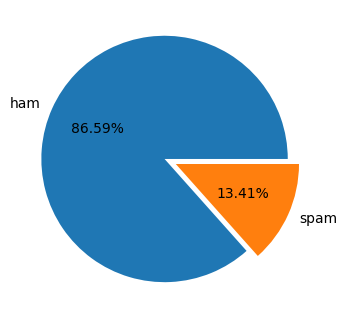

In [100]:
plt.figure(figsize=(4,4))
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


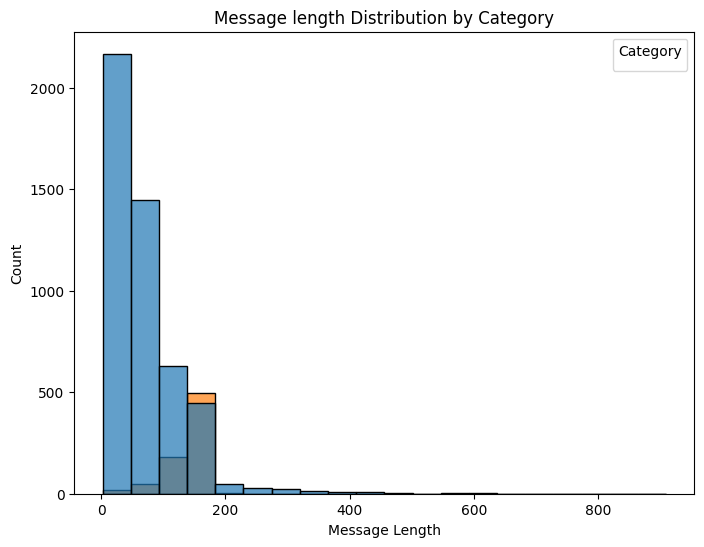

In [101]:
data['Message Length']=data['Message'].apply(len)
plt.figure(figsize=(8,6))
sns.histplot(data=data ,x='Message Length',hue='Category',bins=20,alpha=0.7)
plt.title('Message length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

In [102]:
from wordcloud import WordCloud

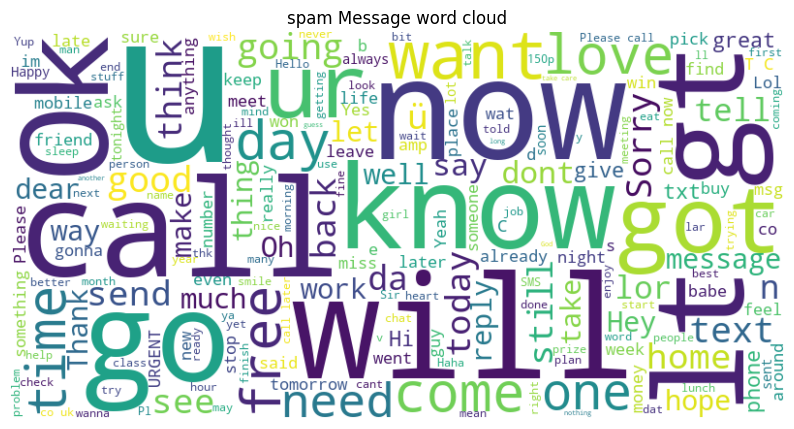

In [103]:
all_messages=' '.join(data['Message'])

wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_messages)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('spam Message word cloud')
plt.axis('off')
plt.show()

In [104]:
from collections import Counter

In [105]:
spam_messages=' '.join(data[data['Category']=='spam']['Message'])

In [106]:
words=spam_messages.split()
word_counts=Counter(words)

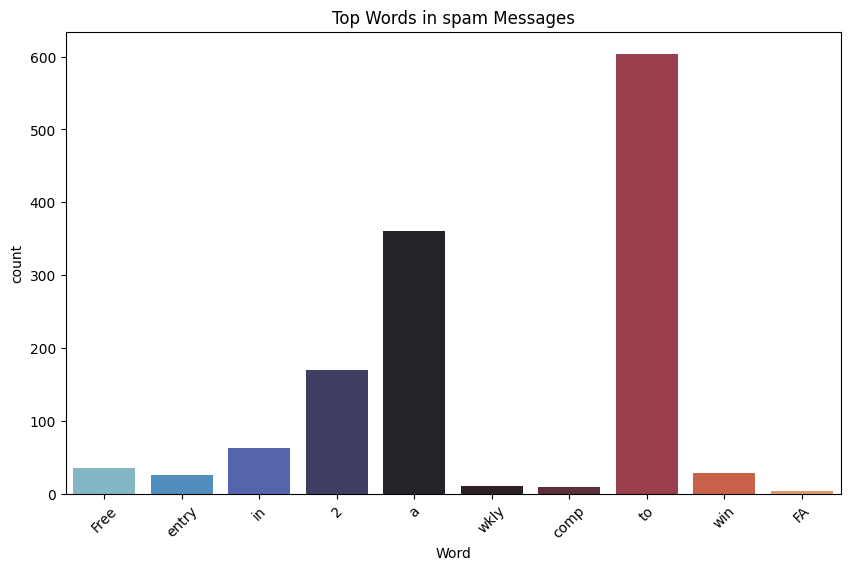

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(word_counts.keys())[:10],y=list(word_counts.values())[:10],palette='icefire')
plt.title('Top Words in spam Messages')
plt.xlabel('Word')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [108]:
data['Category']=data['Category'].apply(lambda x:1 if x=='spam' else 0)

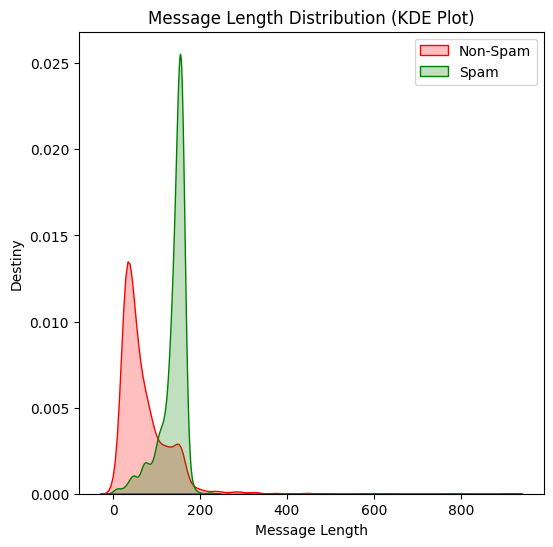

In [109]:
data['Message Length']=data['Message'].apply(len)
plt.figure(figsize=(6,6))
sns.kdeplot(data[data['Category'] == 0]['Message Length'],label ='Non-Spam',fill=True,color='red')
sns.kdeplot(data[data['Category'] == 1]['Message Length'],label ='Spam',fill=True,color='green')
plt.xlabel('Message Length')
plt.ylabel('Destiny')
plt.title('Message Length Distribution (KDE Plot)')
plt.legend()
plt.show()

In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data

In [ ]:
x=data.iloc[:,:3000]
x

In [ ]:
x=x.values
x

In [111]:
y=data.iloc[:,-1]
x

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        111],
       ['Ok lar... Joking wif u oni...', 29],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        155],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?', 57],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        125],
       ['Rofl. Its true to its name', 26]], dtype=object)

In [112]:
y=y.values
y

array([111,  29, 155, ...,  57, 125,  26], dtype=int64)